<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">

**1. Introduction**



As I am in the initial stages of developing my data science and singer-songwriting careers, I thought it would be appropriate to bring both fields together to inform my analysis and songwriting skills. For this short project, I will be predicting the popularity of songs based purely on song metrics such as key, dancibility, and acousticness. Year, artist, era, and genre will not be included. 


**2. Import Packages**

In [1]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

**3. Loading and Viewing Dataset**

We load the dataset and look at the overall statistics such as mean, count, and median.

In [2]:
dataframe = pd.read_csv('SpotifyFeatures.csv')
dataframe.head()

genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0       490867  0.23100          0.000431  C#    0.0964   -14.287  Major   
1       176797  0.20100          0.028000  D#    0.1330   -19.794  Major   
2       266184  0.47000          0.020400   C    0.3630    -8.415  Major   
3       288573  0.00605          0.000000   D    0.1200   -33.440  Major   
4       629760  0.05800          0.146000   D    0.0969   -23.625  Major   

   speechiness    tempo time_signature  valence  
0       0.0547   86.001            4/4   0.0886  
1       0.0581  131.798            4/4   0.3690  
2       0.0383   75.126            3/4   0.0696  
3       0.0480   76.493            4/4   0.0380  
4       0.0493  172.935            4/4   0.0382

In [11]:
dataframe.describe()

popularity   acousticness   danceability   duration_ms  \
count  228159.000000  228159.000000  228159.000000  2.281590e+05   
mean       44.209130       0.351200       0.554198  2.366092e+05   
std        17.276599       0.351385       0.183949  1.166787e+05   
min         0.000000       0.000001       0.056900  1.550900e+04   
25%        33.000000       0.030900       0.437000  1.862530e+05   
50%        47.000000       0.205000       0.570000  2.211730e+05   
75%        57.000000       0.689000       0.690000  2.648400e+05   
max       100.000000       0.996000       0.987000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  228159.000000     228159.000000  228159.000000  228159.000000   
mean        0.580967          0.137310       0.214638      -9.354658   
std         0.260577          0.292447       0.196977       5.940994   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.405000          0.000000       0.097700     -11.287000   
50%         0.618000          0.000037       0.128000      -7.515000   
75%         0.793000          0.023400       0.263000      -5.415000   
max         0.999000          0.999000       1.000000       1.585000   

         speechiness          tempo        valence  
count  228159.000000  228159.000000  228159.000000  
mean        0.122442     117.423062       0.444795  
std         0.186264      30.712458       0.255397  
min         0.022200      30.379000       0.000000  
25%         0.036800      92.734000       0.232000  
50%         0.050600     115.347000       0.430000  
75%         0.109000     138.887000       0.643000  
max         0.967000     239.848000       1.000000

In [3]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


A link to the definitions of these features is shown here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**4. Cleaning NaN Values**

We check for null values. 

In [4]:
pd.isnull(dataframe).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Since there are no null values, we don't have to worry about filling in missing information. 

**5. Exploratory Analysis**

LET'S HAVE FUN!!!! 

#### Top 10 artists with the largest presence in the Top 100
List all of the number of times an artist is shown in the database

In [5]:
# One way
dataframe.groupby('artist_name').count()['track_name'].sort_values(ascending=False).head(10)

artist_name
Giuseppe Verdi             1394
Giacomo Puccini            1137
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Johann Sebastian Bach       632
Ludwig van Beethoven        596
Hans Zimmer                 559
Gioachino Rossini           491
Name: track_name, dtype: int64

In [12]:
# Another way
dataframe['artist_name'].value_counts().head(10)

Giuseppe Verdi             1394
Giacomo Puccini            1137
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Johann Sebastian Bach       632
Ludwig van Beethoven        596
Hans Zimmer                 559
Gioachino Rossini           491
Name: artist_name, dtype: int64

#### Danceablity column analysis

In [11]:
sns.set_style(style='darkgrid')
sns.distplot(dataframe['danceability'],hist=True,kde=True);

**ANALYSIS:** In this graph we can see that most of the tracks are considered danceable from values ​​higher than 0.5, but to make a better analysis we are going to divide them into 3 groups:

* Greater than 75% --- Very danceable
* between 50% and 74% - Regularly danceable
* Minor 50% - non-danceable or instrumental music

In [3]:
# Set conditions
Vd=dataframe['danceability']>=0.75
Ld=(dataframe['danceability']>=0.5) & (dataframe['danceability']<0.75)
Nd=dataframe['danceability']<0.5

In [4]:
data=[Vd.sum(),Ld.sum(),Nd.sum()]
Dance=pd.DataFrame(data,columns=['percent'],
                   index=['Very','Regular','Instrumental'])

In [14]:
Dance

percent
Very            33535
Regular        113665
Instrumental    80959

#### Energy tracks

In [15]:
sns.distplot(dataframe['energy']);

#### Identification of correlations between columns.

In this step we will help you with the `corr ()` function of pandas and then we will make a heat map that will clearly show the correlations between certain columns, although the ideal thing before this step is to have an idea of ​​the columns that will have a possible correlation.

We investigate overall trends in the data to get a good idea of which variables correlate with each other as well as other associations.

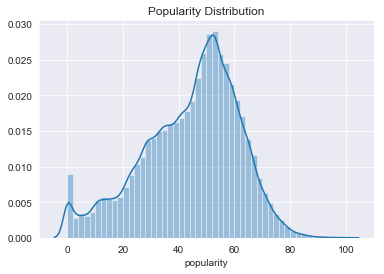

In [16]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution');

In [17]:
dataframe.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.422083      0.294233    -0.041150   
acousticness       -0.422083      1.000000     -0.379441     0.035410   
danceability        0.294233     -0.379441      1.000000    -0.116437   
duration_ms        -0.041150      0.035410     -0.116437     1.000000   
energy              0.277652     -0.723150      0.338110    -0.058045   
instrumentalness   -0.230042      0.323748     -0.360938     0.094618   
liveness           -0.203147      0.086149     -0.034043     0.006760   
loudness            0.413276     -0.698187      0.451336    -0.068716   
speechiness        -0.194673      0.165105      0.135728    -0.017621   
tempo               0.114957     -0.241385      0.018950    -0.027957   
valence             0.119224     -0.335430      0.542405    -0.135970   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.277652         -0.230042 -0.203147  0.413276    -0.194673   
acousticness     -0.723150          0.323748  0.086149 -0.698187     0.165105   
danceability      0.338110         -0.360938 -0.034043  0.451336     0.135728   
duration_ms      -0.058045          0.094618  0.006760 -0.068716    -0.017621   
energy            1.000000         -0.388705  0.182697  0.816640     0.141294   
instrumentalness -0.388705          1.000000 -0.131840 -0.517373    -0.173734   
liveness          0.182697         -0.131840  1.000000  0.035792     0.519542   
loudness          0.816640         -0.517373  0.035792  1.000000    -0.008912   
speechiness       0.141294         -0.173734  0.519542 -0.008912     1.000000   
tempo             0.228067         -0.108424 -0.055556  0.229110    -0.085619   
valence           0.449463         -0.301990  0.018264  0.407057     0.035007   

                     tempo   valence  
popularity        0.114957  0.119224  
acousticness     -0.241385 -0.335430  
danceability      0.018950  0.542405  
duration_ms      -0.027957 -0.135970  
energy            0.228067  0.449463  
instrumentalness -0.108424 -0.301990  
liveness         -0.055556  0.018264  
loudness          0.229110  0.407057  
speechiness      -0.085619  0.035007  
tempo             1.000000  0.120573  
valence           0.120573  1.000000

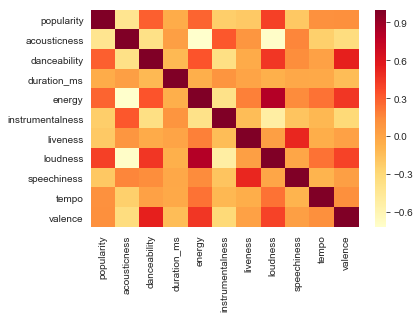

In [18]:
sns.heatmap(dataframe.corr(),cmap="YlOrRd");

In [19]:
from scipy.stats import pearsonr

sns.jointplot(data=dataframe,y='energy',x='loudness',kind='reg',stat_func=pearsonr);

In [5]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Time Signature');

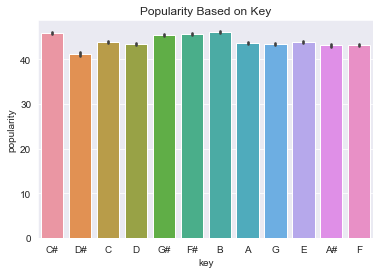

In [21]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key');

In [22]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode');

Since key and mode are related (there can be A major or A minor), we combine those two features in another barplot using "hue". 

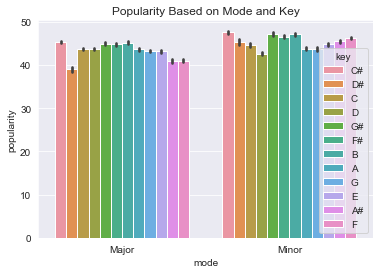

In [23]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key');

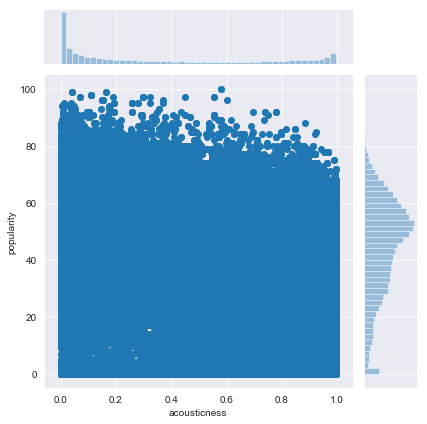

In [24]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe);

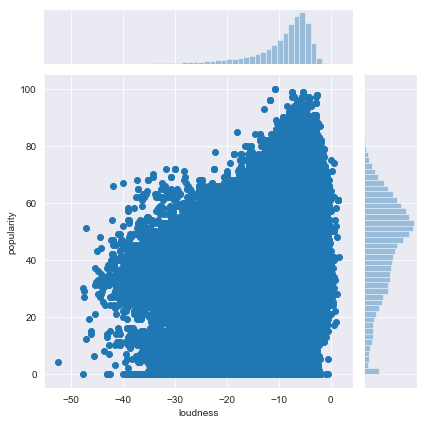

In [25]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe);

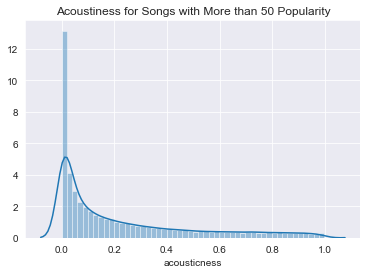

In [26]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity');

In [28]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity');

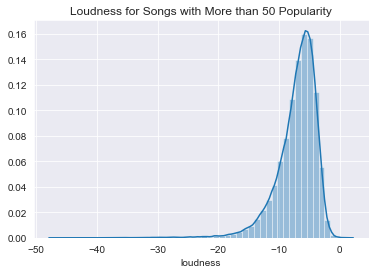

In [27]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity');

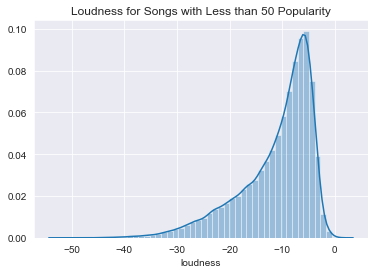

In [29]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity');

From this analysis, there loudness" and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity vs. songs with less than 50 popularity. We plot a summary of all relationships between the features. 

In [ ]:
 sns.pairplot(dataframe)

 **6. Feature Engineering**

There are 3 categorical variables (key, mode, and time signature) that need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0. 

**Key**: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12. 

In [6]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

genre           artist_name        track_name  \
114944  Hip-Hop              Styles P  Morning Mourning   
18641     Dance           The Rapture            Echoes   
38804       R&B               Solange          F.U.B.U.   
122079   Comedy       Sarah Silverman     Phoebe's Song   
141119      Ska  The Suicide Machines      High Society   

                      track_id  popularity  acousticness  danceability  \
114944  1JSVn8h3Ksu4EraRcxZgV8          50      0.053600         0.561   
18641   6ilylHfblTVdDvJtaAiE8U          42      0.000404         0.594   
38804   2aR6SYRJxy2QsBxA459ATF          57      0.840000         0.475   
122079  664UBV5evJWPj8YlG6dIlI          12      0.582000         0.690   
141119  1pdz8332xCMWE9IlxoIjz7          20      0.197000         0.396   

        duration_ms  energy  instrumentalness  key  liveness  loudness   mode  \
114944       216159   0.756          0.000000    3    0.5330    -5.897  Major   
18641        186507   0.944          0.023900    4    0.0742    -3.282  Minor   
38804        313893   0.499          0.000000    2    0.1110    -6.818  Major   
122079       315227   0.295          0.000000    5    0.2050   -11.246  Minor   
141119       117427   0.986          0.000019    9    0.2310    -3.967  Minor   

        speechiness    tempo time_signature  valence  
114944        0.311   75.769            1/4    0.379  
18641         0.253  133.977            4/4    0.418  
38804         0.185  142.867            4/4    0.454  
122079        0.579  125.935            4/4    0.343  
141119        0.184  100.478            5/4    0.386

**Mode**: We will assign major = 1 and minor = 0. 


In [7]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)

genre    artist_name                                 track_name  \
117873    Classical  Maurice Ravel  Vocalise-étude en forme de Habanera, M.51   
30861           Pop           Cuco                            Amor de Siempre   
4236    Alternative    Frank Ocean                                     Nights   
18301         Dance       Fantasia                             When I Met You   
45272    Electronic   Mo' Horizons                                  Foto Viva   

                      track_id  popularity  acousticness  danceability  \
117873  0VFK33U9FhhqBKcAWnwIqf          38         0.995         0.345   
30861   6VZg3YsN5kKBwz39fPcIM1          65         0.615         0.565   
4236    7eqoqGkKwgOaWNNHx90uEZ          78         0.420         0.466   
18301   3rcawAZAKd8Ryi30fSHclr          47         0.433         0.497   
45272   0hEBtVmsVm4b7d4MsKADl9          51         0.578         0.752   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
117873       190137  0.0143          0.894000    2    0.0599   -20.094     0   
30861        321951  0.6420          0.358000    2    0.1380    -7.210     1   
4236         307151  0.5480          0.000001   11    0.1130    -9.362     0   
18301        273467  0.6170          0.000000    5    0.1640    -7.362     1   
45272        364520  0.4980          0.195000    8    0.1510   -10.805     1   

        speechiness    tempo time_signature  valence  
117873       0.0468   69.126            3/4    0.197  
30861        0.0500  122.989            4/4    0.539  
4236         0.1180   89.815            4/4    0.423  
18301        0.0771   79.609            4/4    0.355  
45272        0.0303   99.991            4/4    0.351

In [8]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

genre       artist_name  \
67040           R&B    Meghan Trainor   
183126         Jazz      Raphael Fays   
106271      Hip-Hop             Quavo   
186121         Jazz  Dinah Washington   
26493   Alternative          Megadeth   

                                               track_name  \
67040   Normal - Recorded at Sound Stage Studios Nashv...   
183126                                       Ranger Swing   
106271                      FLIP THE SWITCH (feat. Drake)   
186121                                         So In Love   
26493                  Sweating Bullets - Remastered 2004   

                      track_id  popularity  acousticness  danceability  \
67040   23RbS7epqr1MW0PzTXQ2Yp          48      0.686000         0.597   
183126  61bNf4P5rvoOMNTw16QIg8          42      0.873000         0.872   
106271  1rlIrbWboTRGeKfHhgbJRZ          78      0.129000         0.853   
186121  6UffBd6mbtqAoytYq2zkXm          37      0.720000         0.609   
26493   6i7IXg8j7ZngiEOgBYjkhw          56      0.000319         0.325   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
67040        211880   0.315          0.000000    3    0.1110   -11.414     0   
183126       154693   0.598          0.834000   11    0.0815    -6.079     1   
106271       156195   0.637          0.000000    1    0.2670    -5.924     0   
186121       264240   0.267          0.000241    4    0.0688   -12.027     0   
26493        327040   0.856          0.007080    9    0.2570    -6.547     0   

        speechiness    tempo  time_signature  valence  
67040        0.0595  122.755               0    0.151  
183126       0.0788  113.148               0    0.801  
106271       0.3310   86.048               0    0.496  
186121       0.0382  112.195               0    0.430  
26493        0.1880   69.955               1    0.652

**Popularity**

In [9]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity_class'] = 0
dataframe.loc[dataframe['popularity'] >= 57, 'popularity_class'] = 1

In [45]:
dataframe.head(5)

genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness  key  liveness  loudness  mode  \
0       490867  0.23100          0.000431    0    0.0964   -14.287     1   
1       176797  0.20100          0.028000    1    0.1330   -19.794     1   
2       266184  0.47000          0.020400    2    0.3630    -8.415     1   
3       288573  0.00605          0.000000    3    0.1200   -33.440     1   
4       629760  0.05800          0.146000    3    0.0969   -23.625     1   

   speechiness    tempo  time_signature  valence  popularity_class  
0       0.0547   86.001               0   0.0886               0.0  
1       0.0581  131.798               0   0.3690               0.0  
2       0.0383   75.126               1   0.0696               0.0  
3       0.0480   76.493               0   0.0380               0.0  
4       0.0493  172.935               0   0.0382               0.0

**7. Model Fitting and Predicting**

### CLASSIFICATION

We will use the same models as seen in a previous study on predicting song similarity: https://towardsdatascience.com/song-popularity-predictor-1ef69735e380. For simplicity and using binary classification, we define as the top 25% popular songs as "popular", and the bottom 75% popular songs as "not popular".  

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.

In [11]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

Next we define 80% of the dataframe for training and 20% of the dataframe for testing. 

In [51]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity_class']
X_test = dataframe.drop(training.index)[features]

We add a validation dataset using train_test_split. 

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

**Logistic Regression**

In [53]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.7497945543198379
AUC: 0.5


**Random Forest Classifier**

In [54]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.9219854270530872
AUC: 0.8660926046576054


**Decision Tree Classifier**

In [55]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.8738837451377856
AUC: 0.8572132955347695


**Linear Support Vector Classification**

Since LSVC is O(n^3), and the training data set has 182,000 datapoints, it would take 10^15 operations to train the model. Therefore we will only use 10000 datapoints total. 

In [56]:
training_LSVC = training.sample(10000)
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['popularity_class']
X_test_LSVC = dataframe.drop(training_LSVC.index)[features]
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)


In [57]:
LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

LSVC_AUC = roc_auc_score(y_valid_LSVC, LSVC_Predict) 
print("AUC: " + str(LSVC_AUC))

Accuracy: 0.6735
AUC: 0.5841969330104924


**XGBOOST**

In [58]:
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_valid)
XGB_Accuracy = accuracy_score(y_valid, XGB_Predict)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_valid, XGB_Predict) 
print("AUC: " + str(XGB_AUC))

Accuracy: 0.7497945543198379
AUC: 0.5


**8. Model Performance Summary**

In [59]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC',
                                                      'XGBClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy,
                                                         XGB_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC',
                                                      'XGBClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         DT_AUC,
                                                         LSVC_AUC,
                                                         XGB_AUC]})

In [60]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy
1  RandomForestClassifier  0.921985
2  DecisionTreeClassifier  0.873884
0      LogisticRegression  0.749795
4           XGBClassifier  0.749795
3               LinearSVC  0.673500

In [61]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

Model       AUC
1  RandomForestClassifier  0.866093
2  DecisionTreeClassifier  0.857213
3               LinearSVC  0.584197
0      LogisticRegression  0.500000
4           XGBClassifier  0.500000

**9. Conclusion**

Using a dataset of 228,000 Spotify Tracks, we were able to predict popularity (greater than 57 popularity) using audio-based metrics such as key, mode, and danceability without external metrics such as artist name, genre, and release date. The Random Forest Classifier was the best performing algorithm with 92.0% accuracy and 86.4% AUC. The Decision Tree Classifier was the second best performing algorithm with 87.5% accuracy and 85.8% AUC.

Moving forward, I will use a larger Spotify database by using the Spotify API to collect my own data, and explore different algorithms to predict popularity score rather than doing binary classification. 

**10. References**

1. Cher Lau-Cher Lau - https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
2. Are Hit Songs Becoming Less Musically Diverse?
Andrew Thompson-Matt Daniels-Damián Gaume - https://pudding.cool/2018/05/similarity/
3. Song Popularity Predictor
Mohamed Nasreldin-Mohamed Nasreldin - https://towardsdatascience.com/song-popularity-predictor-1ef69735e380
4. Titanic: Beginner's Guide with Sklearn
https://www.kaggle.com/ialimustafa/titanic-beginner-s-guide-with-sklearn/data
5. **Data Source:** https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv

### REGRESSION

In [11]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [12]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [19]:
X_train.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
79029        0.1330         0.303       278907   0.489            0.0139   10   
51135        0.3930         0.859       139000   0.831            0.4240    2   
89990        0.1380         0.613       253427   0.815            0.8210    2   
44427        0.0707         0.679       330089   0.950            0.9480    2   
6131         0.6860         0.616       224067   0.597            0.0000    4   

       liveness  mode  speechiness    tempo  time_signature  valence  
79029    0.0637     1       0.0364  120.101               0   0.1660  
51135    0.3450     1       0.0791  100.617               0   0.9860  
89990    0.1130     1       0.0295   99.983               0   0.2190  
44427    0.1140     1       0.0614  119.905               0   0.0495  
6131     0.1040     1       0.0415  165.508               0   0.3620

In [20]:
X_valid.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
171476       0.00193         0.413       177819   0.960          0.000009   
68063        0.27500         0.735       212333   0.801          0.000000   
77817        0.77200         0.493       245133   0.579          0.000081   
17868        0.01570         0.608       227467   0.909          0.000000   
51057        0.19500         0.674       416381   0.735          0.860000   

        key  liveness  mode  speechiness    tempo  time_signature  valence  
171476   11    0.7370     1       0.1080  135.708               0    0.605  
68063     0    0.1370     1       0.0554  123.094               0    0.497  
77817     4    0.0759     1       0.0319   93.353               0    0.475  
17868     8    0.3450     1       0.0916   80.386               0    0.754  
51057     9    0.0845     0       0.0357  119.982               0    0.502

In [19]:
y_train.head()

79029    46
51135    28
89990    53
44427    50
6131     65
Name: popularity, dtype: int64

In [21]:
y_valid.head()

171476    15
68063     44
77817     44
17868     50
51057     37
Name: popularity, dtype: int64

In [21]:
print ('Data shape: ', dataframe.sample(frac = 0.8,random_state = 420).shape)
print ('X_train shape: ', X_train.shape)
print ('X_test shape: ', X_valid.shape)
print ('Y_train shape: ', y_train.shape)
print ('Y_test shape: ', y_valid.shape)

Data shape:  (182527, 18)
X_train shape:  (146021, 12)
X_test shape:  (36506, 12)
Y_train shape:  (146021,)
Y_test shape:  (36506,)


**Write code that will build the following regression models:**<br>
popularity ~ feature1<br>
popularity ~ feature1, feature2<br>
.<br>
.<br>
.<br>
popularity ~ feature1, feature2, ... feature12<br>
For each of the models, give the train_r2 and test_r2 score!

In [13]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
def forward_regression(x_train, y_train, x_test, y_test):
    feature_set = []
    return_dict = {}
    for feature in x_train.columns:
        if feature not in feature_set:
            print('Adding %s to current set of features %s' % (feature, feature_set))
            f_set = feature_set.copy()
            f_set.append(feature)
            model = sm.OLS(y_train, sm.add_constant(x_train[f_set])).fit()
            y_pred = model.predict(sm.add_constant(x_test[f_set]))
            # train_r2, test_r2
            return_dict[tuple(f_set)] = [model.rsquared, r2_score(y_test, y_pred)]
        feature_set.append(feature)
    return return_dict

In [14]:
d = forward_regression(X_train, y_train, X_valid, y_valid)
sorted(d.items(), key=lambda x: x[0], reverse=True)

Adding acousticness to current set of features []
Adding danceability to current set of features ['acousticness']
Adding duration_ms to current set of features ['acousticness', 'danceability']
Adding energy to current set of features ['acousticness', 'danceability', 'duration_ms']
Adding instrumentalness to current set of features ['acousticness', 'danceability', 'duration_ms', 'energy']
Adding key to current set of features ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness']
Adding liveness to current set of features ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key']
Adding mode to current set of features ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness']
Adding speechiness to current set of features ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'mode']
Adding tempo to current set of features ['acousticness', 'danceability', 'dura

[(('acousticness',
   'danceability',
   'duration_ms',
   'energy',
   'instrumentalness',
   'key',
   'liveness',
   'mode',
   'speechiness',
   'tempo',
   'time_signature',
   'valence'),
  [0.26202835850899653, 0.26357092172449426]),
 (('acousticness',
   'danceability',
   'duration_ms',
   'energy',
   'instrumentalness',
   'key',
   'liveness',
   'mode',
   'speechiness',
   'tempo',
   'time_signature'),
  [0.2472333284894781, 0.24938217633189508]),
 (('acousticness',
   'danceability',
   'duration_ms',
   'energy',
   'instrumentalness',
   'key',
   'liveness',
   'mode',
   'speechiness',
   'tempo'),
  [0.2464317857851437, 0.2488103502625999]),
 (('acousticness',
   'danceability',
   'duration_ms',
   'energy',
   'instrumentalness',
   'key',
   'liveness',
   'mode',
   'speechiness'),
  [0.24633365956532516, 0.24856502358676813]),
 (('acousticness',
   'danceability',
   'duration_ms',
   'energy',
   'instrumentalness',
   'key',
   'liveness',
   'mode'),
  [0.2

#### Wrapper Method

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This can oftenbe an iterative and computationally expensive proces!

##### Backward Elimination

As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one.

In [15]:
import statsmodels.api as sm
# X_train, X_valid, y_train, y_valid
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.pvalues

const               0.000000e+00
acousticness        0.000000e+00
danceability        0.000000e+00
duration_ms         4.914819e-11
energy              2.729506e-87
instrumentalness    0.000000e+00
key                 8.912849e-09
liveness            0.000000e+00
mode                3.509618e-44
speechiness         0.000000e+00
tempo               8.135522e-15
time_signature      6.223689e-38
valence             0.000000e+00
dtype: float64

In [16]:
# Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.0e-11):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'valence']


#### Embedded Method

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

##### LASSO

In [17]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 78.790161
Best score using built-in LassoCV: 0.001566


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 11 variables


Text(0.5,1,'Feature importance using Lasso Model')

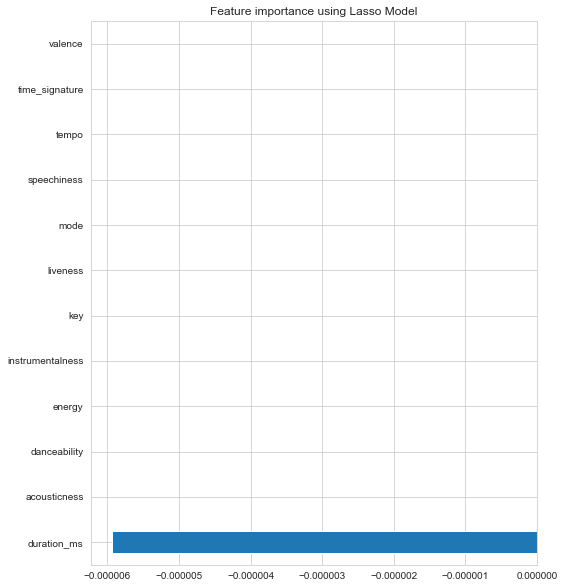

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Great Job!

<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">